In [1]:
import numpy as np 
import pandas as pd 

In [2]:
asn_data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Astronauts%20database/astronauts(Human%20and%20Non%20Humans).csv")

In [3]:
asn_data.sample(5)

,s.no/code given,Astronaut name,country,company space agency,missions,days in space,spacewalks,days spacewalking,acheivement 1,acheivement 2,acheivement 3,acheivement 4,still in space
465,A243,Some Chroococcidiopsis Bacteria,United States of America,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,Chroococcidiopsis,NaN
313,299,Charles J. Precourt,United States of America,NASA,4,38.8,-,-,Crossed Kármán Line,Space Resident,NaN,NaN,NaN
747,A110,Unknown Zebrafish,USSR,NaN,1,NaN,NaN,NaN,First Zebrafish,NaN,NaN,Zebrafish,NaN
169,443,André Kuipers,Netherlands,ESA,2,203.7,-,-,ISS Visitor,Crossed Kármán Line,Space Resident,NaN,NaN
414,A294,Some Deinococcus geothermalis Bacteria,Russia,NaN,1,NaN,NaN,NaN,First Deinococcus geothermalis,NaN,NaN,Deinococcus geothermalis,NaN


In [4]:
asn_data.shape

(952, 13)

In [5]:
asn_data.dtypes

s.no/code given         object
Astronaut name          object
country                 object
company space agency    object
missions                object
days in space           object
spacewalks              object
days spacewalking       object
acheivement 1           object
acheivement 2           object
acheivement 3           object
acheivement 4           object
still in space          object
dtype: object

In [6]:
conv_columns = ['days in space', 'spacewalks', 'days spacewalking', 'missions']
asn_data_f = asn_data.copy()
for col in conv_columns:
    asn_data_f[col] = pd.to_numeric(asn_data_f[col], errors = 'coerce')
asn_data_f.dtypes

s.no/code given          object
Astronaut name           object
country                  object
company space agency     object
missions                float64
days in space           float64
spacewalks              float64
days spacewalking       float64
acheivement 1            object
acheivement 2            object
acheivement 3            object
acheivement 4            object
still in space           object
dtype: object

In [7]:
asn_data_f['acheivement 3'].value_counts()

Space Resident                         146
Elite Spacewalker                       30
Elite Spaceflyer                        16
Frequent Flyer                           4
Frequent Walker                          3
First Man from Israel                    1
First Man from USA                       1
First Man from Canada                    1
First Woman from France                  1
First Man from Spain                     1
First Man from South Africa              1
First Woman from Iran                    1
First Man from Brazil                    1
First Man from United Arab Emirates      1
First Man from Sweden                    1
First Man from Malaysia                  1
First Woman from South Korea             1
First Woman from Italy                   1
First Man from Denmark                   1
First Man from Kazakhstan                1
First Man from USSR                      1
Name: acheivement 3, dtype: int64

In [8]:
asn_data_f[asn_data_f['still in space'] == 'yes']

,s.no/code given,Astronaut name,country,company space agency,missions,days in space,spacewalks,days spacewalking,acheivement 1,acheivement 2,acheivement 3,acheivement 4,still in space
8,604,Kayla Barron,United States of America,NASA,1.0,119.8,1.0,0.3,Crossed Kármán Line,ISS Visitor,Space Resident,NaN,yes
9,603,Matthias Maurer,Germany,ESA,1.0,119.8,NaN,NaN,Crossed Kármán Line,ISS Visitor,Space Resident,NaN,yes
10,602,Raja Chari,United States of America,NASA,1.0,119.8,NaN,NaN,Crossed Kármán Line,ISS Visitor,Space Resident,NaN,yes
11,601,Ye Guangfu,China,CMS,1.0,146.2,1.0,0.3,Crossed Kármán Line,Space Resident,NaN,NaN,yes
30,582,Pyotr Dubrov,Russia,Roscosmos,1.0,335.6,4.0,1.2,Crossed Kármán Line,ISS Visitor,Space Resident,NaN,yes
49,563,Mark Vande Hei,United States of America,NASA,2.0,503.8,4.0,1.1,ISS Visitor,Crossed Kármán Line,Space Resident,NaN,yes
69,543,Wang Yaping,China,CMS,2.0,160.8,1.0,0.3,Crossed Kármán Line,First Chinese woman to perform a spacewalk,Space Resident,NaN,yes
79,533,Anton N. Shkaplerov,Russia,Roscosmos,4.0,689.7,3.0,0.9,ISS Visitor,Crossed Kármán Line,Elite Spaceflyer,NaN,yes
102,510,Thomas H. Marshburn,United States of America,NASA,3.0,281.0,5.0,1.3,ISS Visitor,Crossed Kármán Line,Space Resident,NaN,yes
120,492,Zhai Zhigang,China,CMS,2.0,149.0,3.0,0.5,Crossed Kármán Line,Space Resident,NaN,NaN,yes


In [9]:
asn_country = asn_data_f['country'].value_counts().reset_index()
asn_country.columns = ['country','no_of_astronauts']

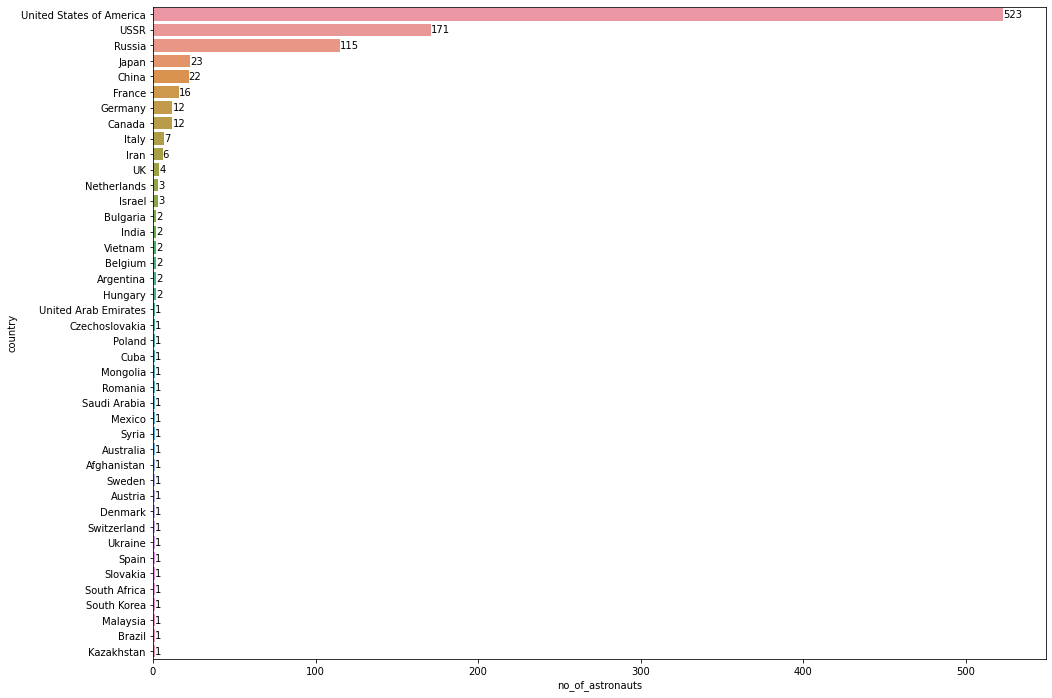

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.figure(figsize = (16,12))
ax = sns.barplot(data = asn_country, x = 'no_of_astronauts', y = 'country')
ax.bar_label(ax.containers[0])
plt.show()

In [11]:
grouped_data = asn_data_f.groupby('country').sum().reset_index()
grouped_data.head()

,country,missions,days in space,spacewalks,days spacewalking
0,Afghanistan,1.0,8.9,0.0,0.0
1,Argentina,2.0,0.0,0.0,0.0
2,Australia,1.0,0.0,0.0,0.0
3,Austria,1.0,7.9,0.0,0.0
4,Belgium,3.0,207.6,0.0,0.0


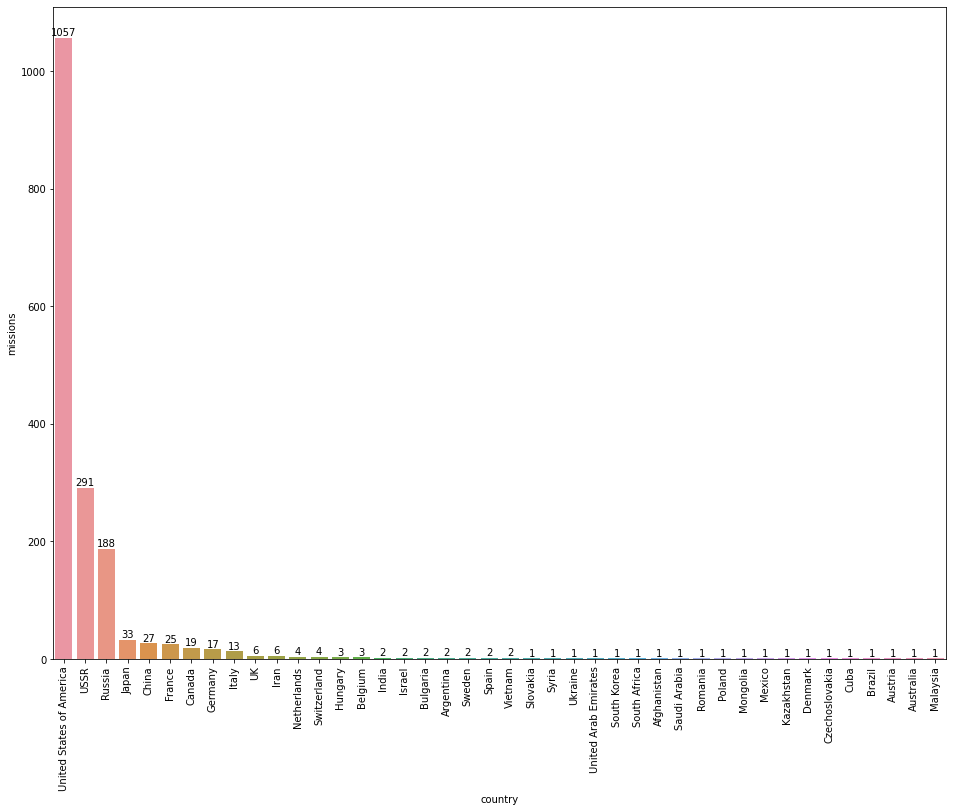

In [12]:
plt.figure(figsize = (16,12))
ax = sns.barplot(data = grouped_data.sort_values(by = 'missions', ascending = False), x = 'country', y = 'missions')
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0])
plt.show()

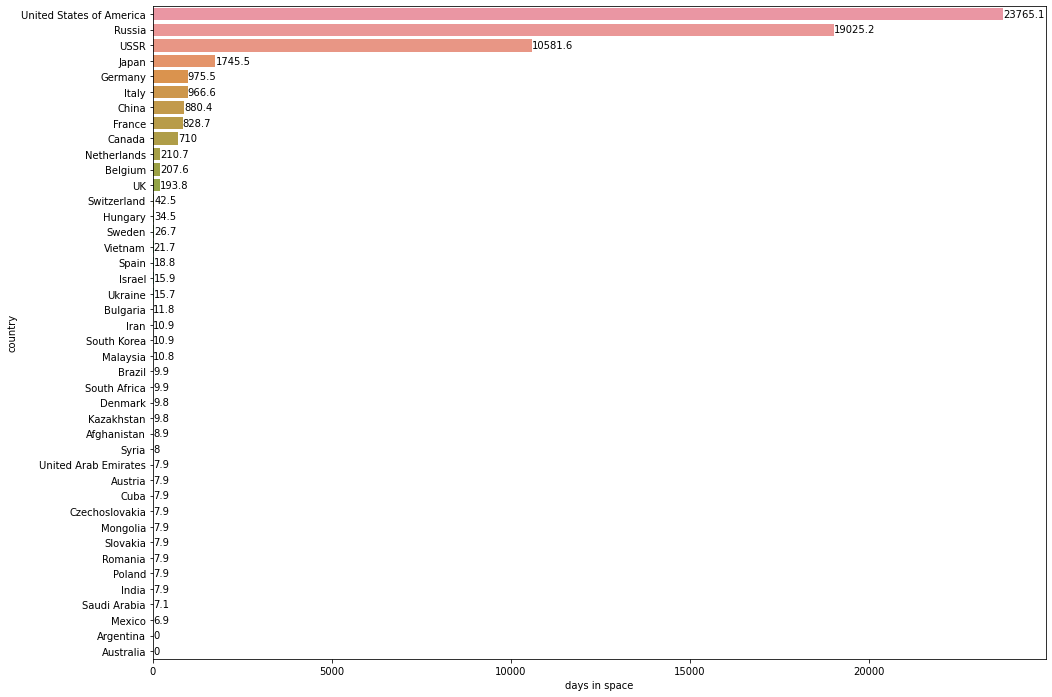

In [13]:
plt.figure(figsize = (16,12))
ax = sns.barplot(data = grouped_data.sort_values(by = 'days in space', ascending = False), y = 'country', x = 'days in space')
ax.bar_label(ax.containers[0])
plt.show()

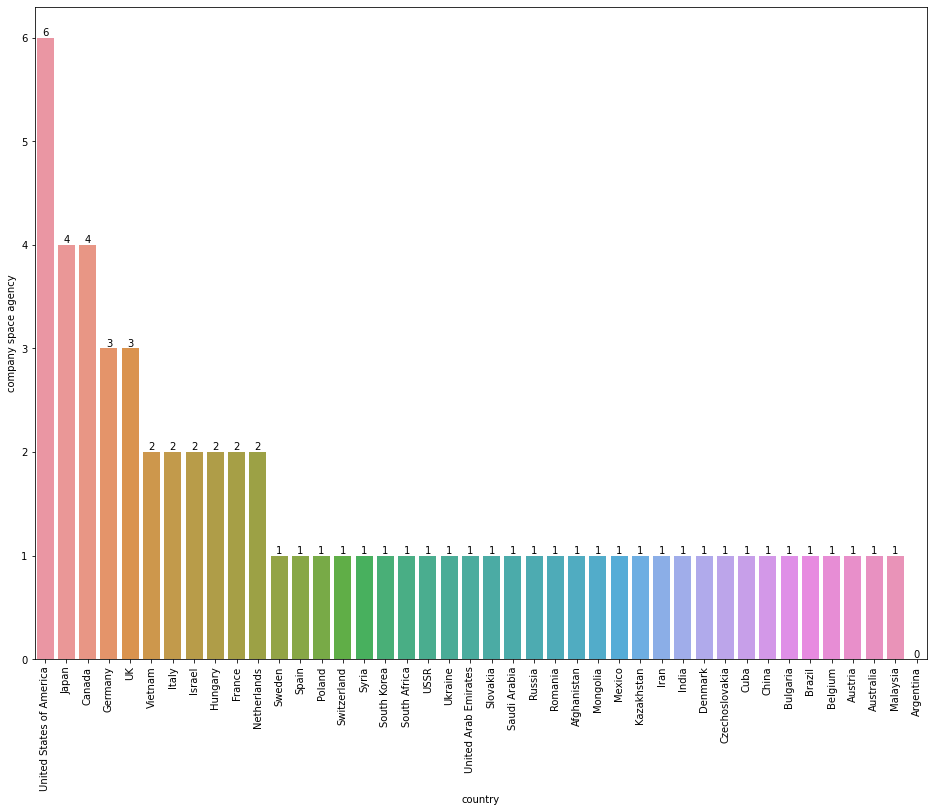

In [14]:
country_agency = asn_data_f.groupby('country')['company space agency'].nunique().reset_index().sort_values(by = 'company space agency', ascending = False)

plt.figure(figsize = (16,12))
ax = sns.barplot(data = country_agency, x = 'country', y = 'company space agency')
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0])
plt.show()

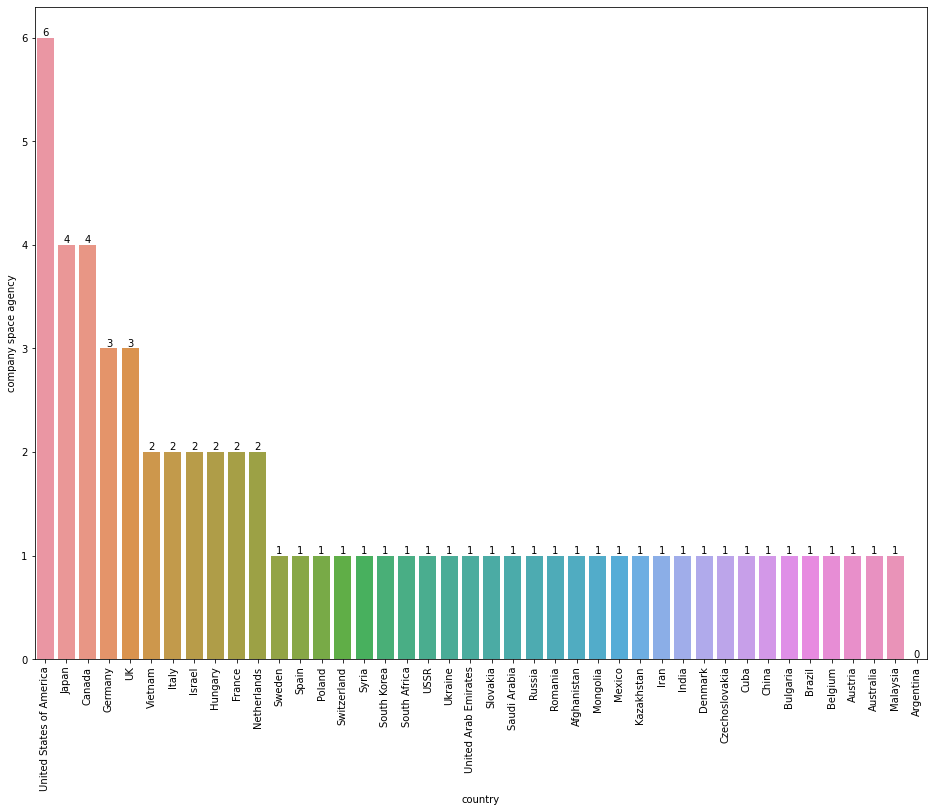

In [17]:

country_agency = asn_data_f.groupby('country')['company space agency'].nunique().reset_index().sort_values(by = 'company space agency', ascending = False)

plt.figure(figsize = (16,12))
ax = sns.barplot(data = country_agency, x = 'country', y = 'company space agency')
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0])
plt.show()

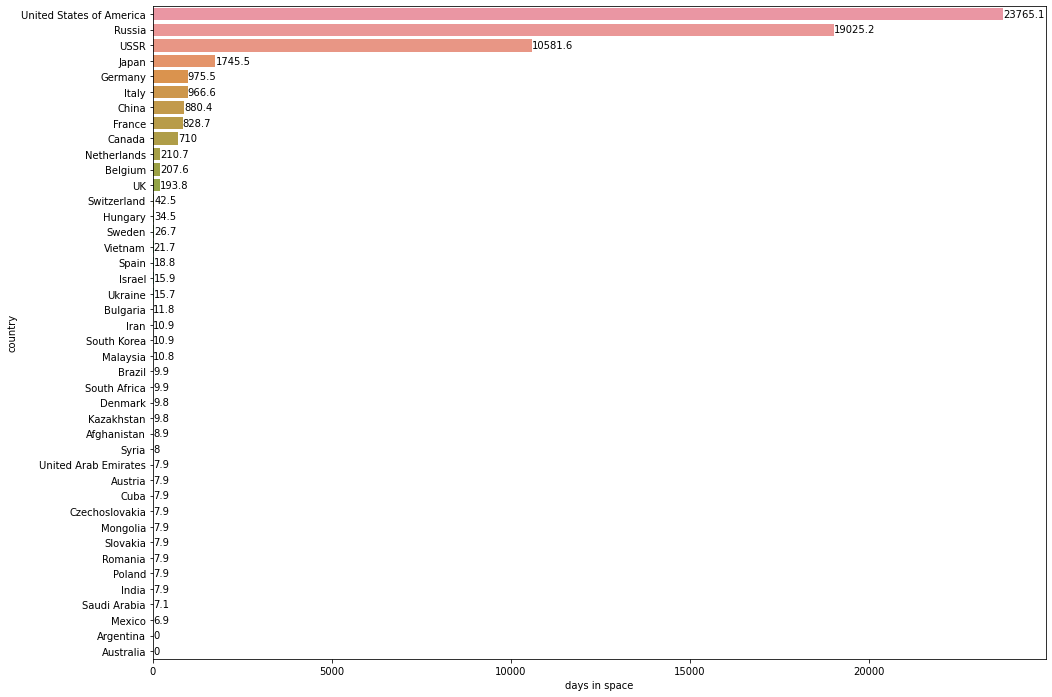

In [18]:
plt.figure(figsize = (16,12))
ax = sns.barplot(data = grouped_data.sort_values(by = 'days in space', ascending = False), y = 'country', x = 'days in space')
ax.bar_label(ax.containers[0])
plt.show()

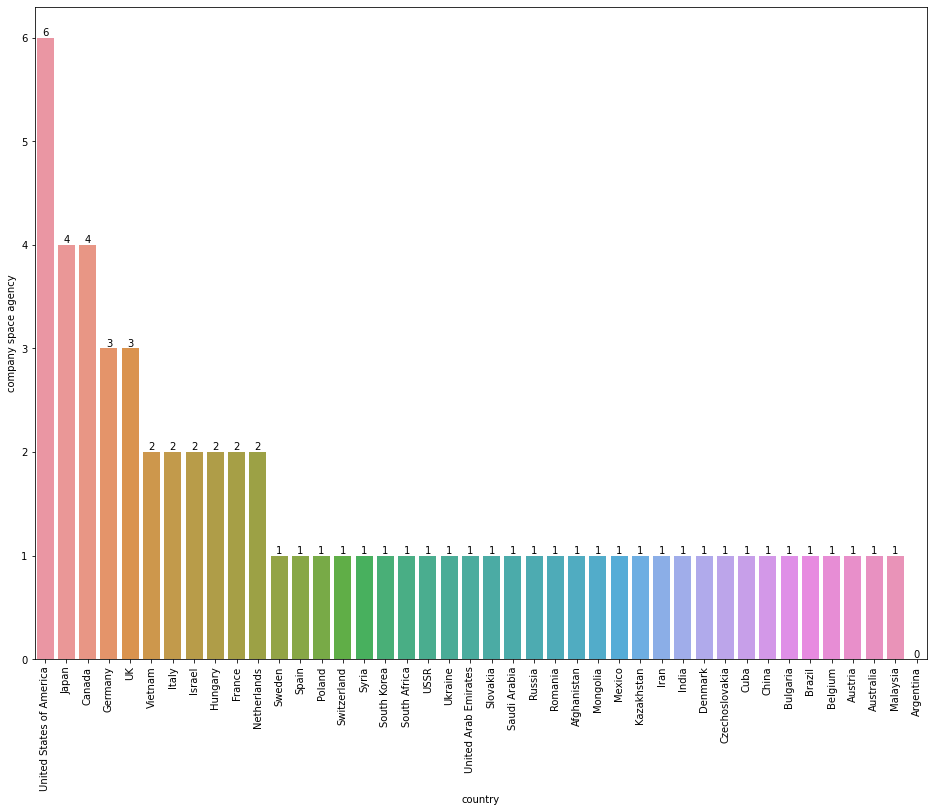

In [19]:
country_agency = asn_data_f.groupby('country')['company space agency'].nunique().reset_index().sort_values(by = 'company space agency', ascending = False)

plt.figure(figsize = (16,12))
ax = sns.barplot(data = country_agency, x = 'country', y = 'company space agency')
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0])
plt.show()

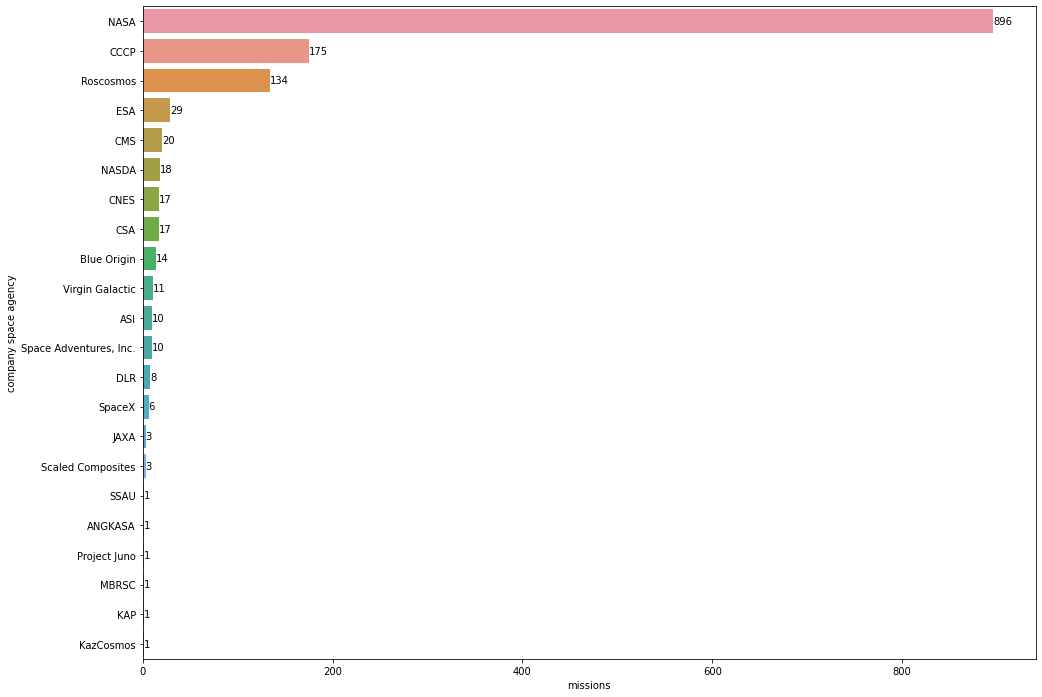

In [20]:
agency_mission = asn_data_f.groupby('company space agency')['missions'].sum().reset_index().sort_values(by = 'missions', ascending = False)

plt.figure(figsize = (16,12))
ax = sns.barplot(data = agency_mission, y = 'company space agency', x = 'missions')
ax.bar_label(ax.containers[0])
plt.show()